In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nslkdd/KDDTest+.arff
/kaggle/input/nslkdd/KDDTest-21.arff
/kaggle/input/nslkdd/KDDTest1.jpg
/kaggle/input/nslkdd/KDDTrain+.txt
/kaggle/input/nslkdd/KDDTrain+_20Percent.txt
/kaggle/input/nslkdd/KDDTest-21.txt
/kaggle/input/nslkdd/KDDTest+.txt
/kaggle/input/nslkdd/KDDTrain+.arff
/kaggle/input/nslkdd/index.html
/kaggle/input/nslkdd/KDDTrain+_20Percent.arff
/kaggle/input/nslkdd/KDDTrain1.jpg
/kaggle/input/nslkdd/nsl-kdd/KDDTest+.arff
/kaggle/input/nslkdd/nsl-kdd/KDDTest-21.arff
/kaggle/input/nslkdd/nsl-kdd/KDDTest1.jpg
/kaggle/input/nslkdd/nsl-kdd/KDDTrain+.txt
/kaggle/input/nslkdd/nsl-kdd/KDDTrain+_20Percent.txt
/kaggle/input/nslkdd/nsl-kdd/KDDTest-21.txt
/kaggle/input/nslkdd/nsl-kdd/KDDTest+.txt
/kaggle/input/nslkdd/nsl-kdd/KDDTrain+.arff
/kaggle/input/nslkdd/nsl-kdd/index.html
/kaggle/input/nslkdd/nsl-kdd/KDDTrain+_20Percent.arff
/kaggle/input/nslkdd/nsl-kdd/KDDTrain1.jpg


In [2]:
#Load dataset
local_path = "/kaggle/input/nslkdd/"
df_train = pd.read_csv(local_path +"KDDTrain+.txt", header = None)
df_test = pd.read_csv(local_path +"KDDTest+.txt", header = None)

In [3]:
columns = (['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot'
,'num_failed_logins','logged_in','num_compromised','root_shell','su_attempted','num_root','num_file_creations'
,'num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count','serror_rate'
,'srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count','dst_host_srv_count'
,'dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate'
,'dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','outcome','level'])

selected_features = (['src_bytes', 'same_srv_rate', 'flag', 'dst_host_serror_rate', 'srv_serror_rate', 'dst_host_same_srv_rate', 'diff_srv_rate', 
                      'count', 'dst_host_srv_serror_rate', 'serror_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_bytes', 
                      'dst_host_diff_srv_rate', 'protocol_type', 'dst_host_srv_count', 'service', 'srv_count', 'dst_host_count', 'dst_host_rerror_rate'])

In [4]:
df_train.columns = columns
df_test.columns = columns

In [5]:
# Filter only the selected 20 features
df_train = df_train[selected_features + ['outcome']]
df_test = df_test[selected_features + ['outcome']]

# Display the shape to confirm
print("Train shape:", df_train.shape)
print("Test shape:", df_test.shape)

Train shape: (125973, 21)
Test shape: (22544, 21)


In [6]:
df_train.head()

,src_bytes,same_srv_rate,flag,dst_host_serror_rate,srv_serror_rate,dst_host_same_srv_rate,diff_srv_rate,count,dst_host_srv_serror_rate,serror_rate,...,dst_host_srv_diff_host_rate,dst_bytes,dst_host_diff_srv_rate,protocol_type,dst_host_srv_count,service,srv_count,dst_host_count,dst_host_rerror_rate,outcome
0,491,1.00,SF,0.00,0.0,0.17,0.00,2,0.00,0.0,...,0.00,0,0.03,tcp,25,ftp_data,2,150,0.05,normal
1,146,0.08,SF,0.00,0.0,0.00,0.15,13,0.00,0.0,...,0.00,0,0.60,udp,1,other,1,255,0.00,normal
2,0,0.05,S0,1.00,1.0,0.10,0.07,123,1.00,1.0,...,0.00,0,0.05,tcp,26,private,6,255,0.00,neptune
3,232,1.00,SF,0.03,0.2,1.00,0.00,5,0.01,0.2,...,0.04,8153,0.00,tcp,255,http,5,30,0.00,normal
4,199,1.00,SF,0.00,0.0,1.00,0.00,30,0.00,0.0,...,0.00,420,0.00,tcp,255,http,32,255,0.00,normal


In [7]:
categorical_features = ['protocol_type', 'service', 'flag']

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

In [9]:
df_train = df_train[selected_features + ['outcome']]
df_test  = df_test[selected_features + ['outcome']]

print("Train shape:", df_train.shape)
print("Test shape (before filtering):", df_test.shape)

Train shape: (125973, 21)
Test shape (before filtering): (22544, 21)


In [10]:
train_labels = set(df_train['outcome'].unique())

df_test = df_test[df_test['outcome'].isin(train_labels)].reset_index(drop=True)

print("Test shape (after filtering unseen labels):", df_test.shape)

Test shape (after filtering unseen labels): (18794, 21)


In [11]:
X_train = df_train.drop(columns=['outcome'])
y_train = df_train['outcome']

X_test = df_test.drop(columns=['outcome'])
y_test = df_test['outcome']

In [12]:
label_encoder = LabelEncoder()

y_train_enc = label_encoder.fit_transform(y_train)
y_test_enc  = label_encoder.transform(y_test)

print("Number of classes:", len(label_encoder.classes_))
print("Classes:", label_encoder.classes_)

Number of classes: 23
Classes: ['back' 'buffer_overflow' 'ftp_write' 'guess_passwd' 'imap' 'ipsweep'
 'land' 'loadmodule' 'multihop' 'neptune' 'nmap' 'normal' 'perl' 'phf'
 'pod' 'portsweep' 'rootkit' 'satan' 'smurf' 'spy' 'teardrop'
 'warezclient' 'warezmaster']


In [13]:
categorical_features = ['protocol_type', 'service', 'flag']
numeric_features = X_train.columns.difference(categorical_features)

In [15]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('num', 'passthrough', numeric_features)
    ]
)

In [24]:
rf_model = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    n_jobs=-1,
    class_weight='balanced'
)

from xgboost import XGBClassifier

xgb_model = XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=6,
    random_state=42,
    tree_method='hist', # Faster for large datasets
    device='cuda' # Use if you have a GPU
)

import lightgbm as lgb

lgbm_model = lgb.LGBMClassifier(
    n_estimators=200,
    learning_rate=0.05,
    class_weight='balanced',
    random_state=42
)

/usr/local/lib/python3.12/dist-packages/sqlalchemy/orm/query.py:195: SyntaxWarning: "is not" with 'tuple' literal. Did you mean "!="?
  if entities is not ():


In [31]:
pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('classifier', lgbm_model)
])

In [32]:
pipeline.fit(X_train, y_train_enc)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020103 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2610
[LightGBM] [Info] Number of data points in the train set: 125973, number of used features: 92
[LightGBM] [Info] Start training from score -3.135494
[LightGBM] [Info] Start training from score -3.135494
[LightGBM] [Info] Start training from score -3.135494
[LightGBM] [Info] Start training from score -3.135494
[LightGBM] [Info] Start training from score -3.135494
[LightGBM] [Info] Start training from score -3.135494
[LightGBM] [Info] Start training from score -3.135494
[LightGBM] [Info] Start training from score -3.135494
[LightGBM] [Info] Start training from score -3.135494
[LightGBM] [Info] Start training from score -3.135494
[LightGBM] [Info] Start training from score -3.135494
[LightGBM] [Info] Start training from score -3.13549

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['protocol_type', 'service',
                                                   'flag']),
                                                 ('num', 'passthrough',
                                                  Index(['count', 'diff_srv_rate', 'dst_bytes', 'dst_host_count',
       'dst_host_diff_srv_rate', 'dst_host_rerror_rate',
       'dst_host_same_src_port_rate', 'dst_host_same_srv_rate',
       'dst_host_serror_rate', 'dst_host_srv_count',
       'dst_host_srv_diff_host_rate', 'dst_host_srv_serror_rate',
       'same_srv_rate', 'serror_rate', 'src_bytes', 'srv_count',
       'srv_serror_rate'],
      dtype='object'))])),
                ('classifier',
                 LGBMClassifier(class_weight='balanced', learning_rate=0.05,
                                n_estimators=200, random_state=42))])

In [33]:
y_pred = pipeline.predict(X_test)

print("Accuracy:", accuracy_score(y_test_enc, y_pred))

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Accuracy: 0.8349473236139193


In [34]:
import numpy as np

# Get labels actually present in test set
test_labels = np.unique(y_test_enc)

print("\nClassification Report:\n",
      classification_report(
          y_test_enc,
          y_pred,
          labels=test_labels,
          target_names=label_encoder.inverse_transform(test_labels)
      ))


Classification Report:
                  precision    recall  f1-score   support

           back       0.98      0.94      0.96       359
buffer_overflow       0.00      0.00      0.00        20
      ftp_write       0.00      0.00      0.00         3
   guess_passwd       1.00      0.00      0.00      1231
           imap       0.00      0.00      0.00         1
        ipsweep       0.99      0.99      0.99       141
           land       1.00      0.57      0.73         7
     loadmodule       0.00      0.00      0.00         2
       multihop       0.00      0.00      0.00        18
        neptune       1.00      0.99      1.00      4657
           nmap       0.97      1.00      0.99        73
         normal       0.80      0.92      0.86      9711
           perl       0.00      0.00      0.00         2
            phf       0.00      0.00      0.00         2
            pod       0.49      0.95      0.65        41
      portsweep       0.76      0.94      0.84       157
     

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<Figure size 100000x100000 with 0 Axes>

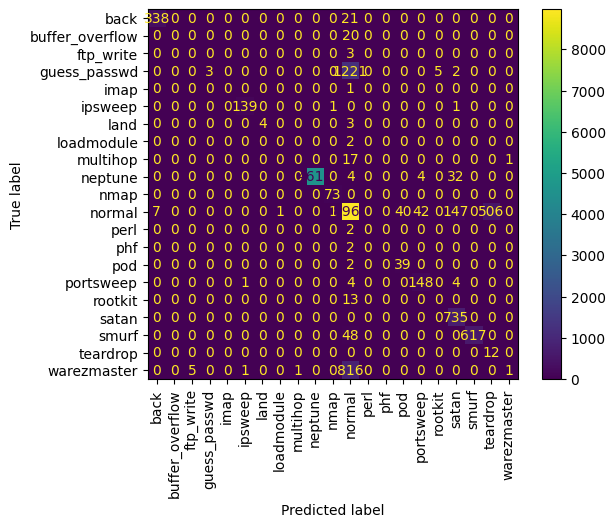

In [35]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

plt.figure(figsize=(1000, 1000))  # 👈 increase size here

ConfusionMatrixDisplay.from_predictions(
    y_test_enc,
    y_pred,
    labels=test_labels,
    display_labels=label_encoder.inverse_transform(test_labels),
    xticks_rotation=90
)

plt.show()

In [36]:
joblib.dump(pipeline, "random_forest_intrusion_model.pkl")
joblib.dump(label_encoder, "label_encoder.pkl")
joblib.dump(selected_features, "selected_features.pkl")

['selected_features.pkl']

In [37]:
model = joblib.load("random_forest_intrusion_model.pkl")
label_encoder = joblib.load("label_encoder.pkl")

sample = X_test.iloc[[0]]
pred = model.predict(sample)

print("Prediction:", label_encoder.inverse_transform(pred))

Prediction: ['neptune']


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
